100%|██████████| 100/100 [03:55<00:00,  2.35s/it]


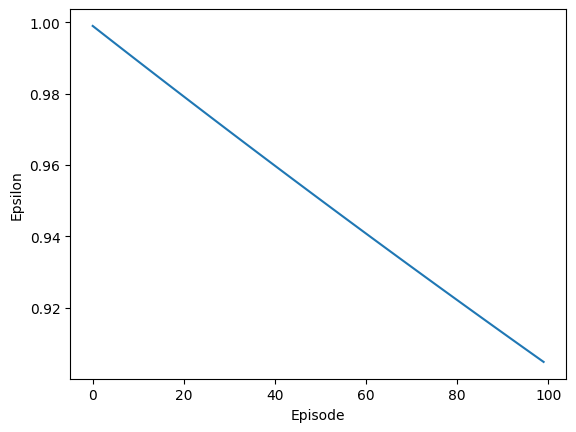

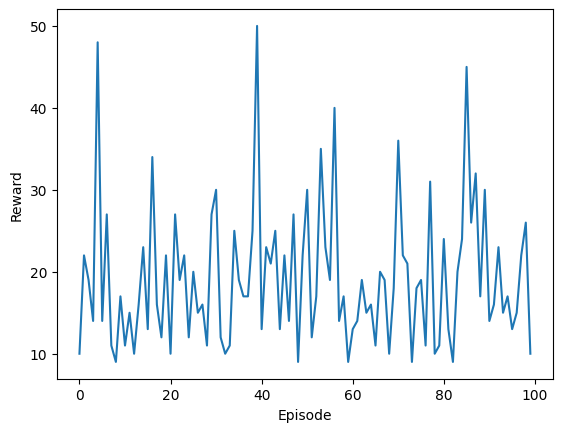

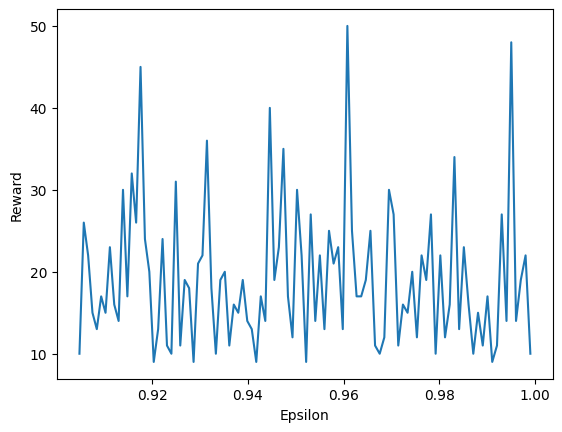

In [7]:
# same using neural network

# Path: new.ipynb   
# an open ai gym environment with epsilon decrease from 1 to 0.1 and plot the epsilon vs episode

import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf
import tqdm

env = gym.make('CartPole-v0')
env.reset()

# hyperparameters
alpha = 0.1
gamma = 0.9
epsilon = 1
epsilon_min = 0.1
epsilon_decay = 0.999
num_episodes = 100
num_steps = 200
num_episodes_to_train = 100

# create model
model = tf.keras.Sequential()
model.add(layers.Dense(24, input_dim=4, activation='relu'))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(2, activation='linear'))
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# plot epsilon vs episode
def plot_epsilon_vs_episode(epsilon_list):
    plt.plot(epsilon_list)
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.show()

# plot reward vs episode
def plot_reward_vs_episode(reward_list):
    plt.plot(reward_list)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()

def plot_reward_vs_epsilon(reward_list, epsilon_list):
    plt.plot(epsilon_list, reward_list)
    plt.xlabel('Epsilon')
    plt.ylabel('Reward')
    plt.show()

# train
def train():
    global epsilon
    reward_list = []
    epsilon_list = []
    for episode in tqdm.tqdm(range(num_episodes)):
        state = env.reset()
        total_reward = 0
        for step in range(num_steps):
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(model.predict(np.array([state])))
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            target = reward
            if not done:
                target = reward + gamma * np.amax(model.predict(np.array([next_state])))
            target_f = model.predict(np.array([state]))
            target_f[0][action] = target
            model.fit(np.array([state]), target_f, epochs=1, verbose=0)
            state = next_state
            if done:
                break
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_list.append(epsilon)
        reward_list.append(total_reward)
    plot_epsilon_vs_episode(epsilon_list)
    plot_reward_vs_episode(reward_list)
    plot_reward_vs_epsilon(reward_list, epsilon_list)

# test
def test():
    state = env.reset()
    for step in range(num_steps):
        env.render()
        action = np.argmax(model.predict(np.array([state])))
        next_state, reward, done, _ = env.step(action)
        state = next_state
        if done:
            break

# main
if __name__ == '__main__':
    train()
    # test()

In [70]:
# same using neural network with env as FrozenLake-v1

# Path: new.ipynb

import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf
import tqdm

env = gym.make('FrozenLake-v1', is_slippery=True)
env.reset()

# hyperparameters
alpha = 0.1
gamma = 0.9
epsilon = 1
epsilon_min = 0.1
epsilon_decay = 0.999
num_episodes = 1000
num_steps = 200
num_episodes_to_train = 100

# create model
model = tf.keras.Sequential()
model.add(layers.Input(shape=1))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
# model.summary()

# plot epsilon vs episode
def plot_epsilon_vs_episode(epsilon_list):
    plt.plot(epsilon_list)
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.show()

# plot reward vs episode
def plot_reward_vs_episode(reward_list):
    plt.plot(reward_list)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()

def plot_reward_vs_epsilon(reward_list, epsilon_list):
    plt.plot(epsilon_list, reward_list)
    plt.xlabel('Epsilon')
    plt.ylabel('Reward')
    plt.show()

# train
def train():
    global epsilon
    reward_list = []
    epsilon_list = []
    for episode in tqdm.tqdm(range(num_episodes)):
        state = env.reset()
        total_reward = 0
        for step in range(num_steps):
            # print(state)
            # print(np.array([state]))
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                # print(3/2 * (model.predict(np.array([state]))+1))
                # action = np.argmax(model.predict(np.array([state])))
                action = np.round(3/2 * (model.predict(np.array([state]))+1))
            
            action = int(action)
            # print(action)
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            target = reward
            if not done:
                # target = reward + gamma * np.amax(model.predict(np.array([next_state])))
                target = reward + gamma * np.round(3/2* (model.predict(np.array([next_state]))+1))
            else:
                target = np.round(3/2 * (model.predict(np.array([state]))+1)) # game over

            model.fit(np.array([state]), target, epochs=1, verbose=0)
            state = next_state
            if done:
                break
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_list.append(epsilon)
        reward_list.append(total_reward)
    plot_epsilon_vs_episode(epsilon_list)
    plot_reward_vs_episode(reward_list)
    plot_reward_vs_epsilon(reward_list, epsilon_list)

# test
def test():
    state = env.reset()
    for step in range(num_steps):
        env.render()
        action = np.argmax(model.predict(np.array([state])))
        next_state, reward, done, _ = env.step(action)
        state = next_state
        if done:
            break

100%|██████████| 1000/1000 [17:37<00:00,  1.06s/it]


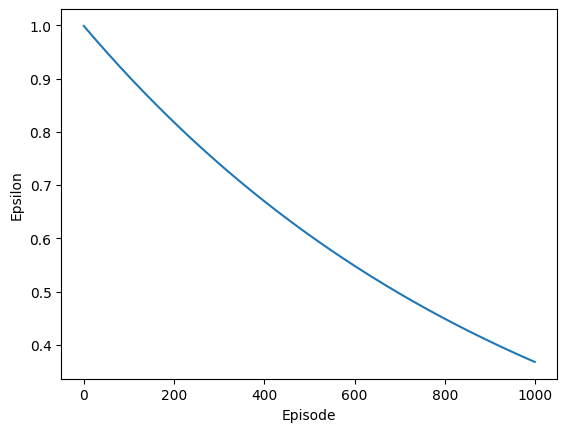

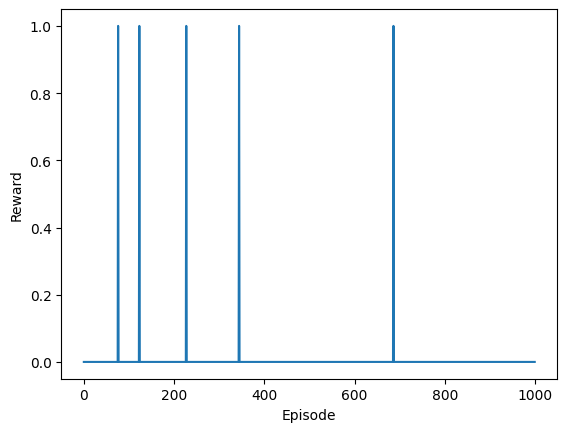

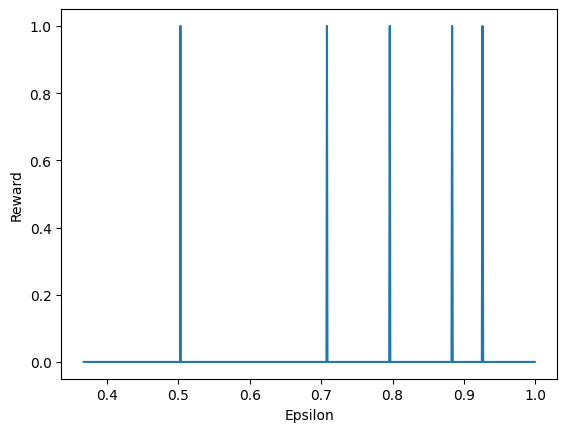

In [71]:
# main
if __name__ == '__main__':
    train()

In [49]:
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [12]:
from tensorflow.keras.layers import InputLayer

In [54]:
# same using neural network with env as FrozenLake-v1

# Path: new.ipynb

import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf
import tqdm

env = gym.make('FrozenLake-v1', is_slippery=True)
env.reset()

# hyperparameters
alpha = 0.1
gamma = 0.9
epsilon = 1
epsilon_min = 0.1
epsilon_decay = 0.999
num_episodes = 1000
num_steps = 200
num_episodes_to_train = 100

# create model
model = tf.keras.Sequential()
model.add(layers.Input(shape=1))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))


# plot epsilon vs episode
def plot_epsilon_vs_episode(epsilon_list):
    plt.plot(epsilon_list)
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.show()


# plot reward vs episode
def plot_reward_vs_episode(reward_list):
    plt.plot(reward_list)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()


def plot_reward_vs_epsilon(reward_list, epsilon_list):
    plt.plot(epsilon_list, reward_list)
    plt.xlabel('Epsilon')
    plt.ylabel('Reward')
    plt.show()


# train
def train():
    global epsilon
    reward_list = []
    epsilon_list = []
    for episode in tqdm.tqdm(range(num_episodes)):
        state = env.reset()
        total_reward = 0
        for step in range(num_steps):
            # print(state)
            # print(np.array([state]))
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                # print(3/2 * (model.predict(np.array([state]))+1))
                # action = np.argmax(model.predict(np.array([state])))
                action = np.round(3/2 * (model.predict(np.array([state]))+1))
            
            action = int(action)
            # print(action)
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            target = reward
            if not done:
                # target = reward + gamma * np.amax(model.predict(np.array([next_state])))
                target = reward + gamma * np.round(3/2* (model.predict(np.array([next_state]))+1))
            else:
                target = np.round(3/2 * (model.predict(np.array([state]))+1)) # game over

            model.fit(np.array([state]), target, epochs=1, verbose=0)
            state = next_state
            if done:
                break
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_list.append(epsilon)
        reward_list.append(total_reward)
    plot_epsilon_vs_episode(epsilon_list)
    plot_reward_vs_episode(reward_list)
    plot_reward_vs_epsilon(reward_list, epsilon_list)


# test
def test():
    state = env.reset()
    for step in range(num_steps):
        env.render()
        action = np.argmax(model.predict(np.array([state])))
        next_state, reward, done, _ = env.step(action)
        state = next_state
        if done:
            break


# main
if __name__ == '__main__':
    train()
    # test()

  1%|          | 9/1000 [00:04<08:52,  1.86it/s]


KeyboardInterrupt: 

In [55]:
import gym
from gym.envs.registration import register
from gym.envs.toy_text.frozen_lake import generate_random_map

random_map = generate_random_map(size=10, p=0.3)
env = gym.make("FrozenLake-v1", desc=random_map)
env.reset()

0

In [66]:
# hyperparameters
alpha = 0.1
gamma = 0.9
epsilon = 1
epsilon_min = 0.1
epsilon_decay = 0.999
num_episodes = 1000
num_steps = 200
num_episodes_to_train = 100

# create model
model = tf.keras.Sequential()
model.add(layers.InputLayer(input_shape=1))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [67]:
# plot epsilon vs episode
def plot_epsilon_vs_episode(epsilon_list):
    plt.plot(epsilon_list)
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.show()


# plot reward vs episode
def plot_reward_vs_episode(reward_list):
    plt.plot(reward_list)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()


def plot_reward_vs_epsilon(reward_list, epsilon_list):
    plt.plot(epsilon_list, reward_list)
    plt.xlabel('Epsilon')
    plt.ylabel('Reward')
    plt.show()

In [68]:
# train
def train():
    global epsilon
    reward_list = []
    epsilon_list = []
    for episode in tqdm.tqdm(range(num_episodes)):
        state = env.reset()
        total_reward = 0
        for step in range(num_steps):
            # print(state)
            # print(np.array([state]))
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                # print(3/2 * (model.predict(np.array([state]))+1))
                # action = np.argmax(model.predict(np.array([state])))
                action = np.round(3/2 * (model.predict(np.array([state]))+1))
            
            action = int(action)
            # print(action)
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            target = reward
            if not done:
                # target = reward + gamma * np.amax(model.predict(np.array([next_state])))
                target = reward + gamma * np.round(3/2* (model.predict(np.array([next_state]))+1))
            else:
                target = np.round(3/2 * (model.predict(np.array([state]))+1)) # game over

            model.fit(np.array([state]), target, epochs=1, verbose=0)
            state = next_state
            if done:
                break
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_list.append(epsilon)
        reward_list.append(total_reward)
    plot_epsilon_vs_episode(epsilon_list)
    plot_reward_vs_episode(reward_list)
    plot_reward_vs_epsilon(reward_list, epsilon_list)

  0%|          | 0/1000 [00:00<?, ?it/s]Exception ignored in: <function ScopedTFGraph.__del__ at 0x00000293CA33D0D0>
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\envs\ai_gpu\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 58, in __del__
    self.deleter(self.graph)
AttributeError: deleter
100%|██████████| 1000/1000 [09:48<00:00,  1.70it/s]


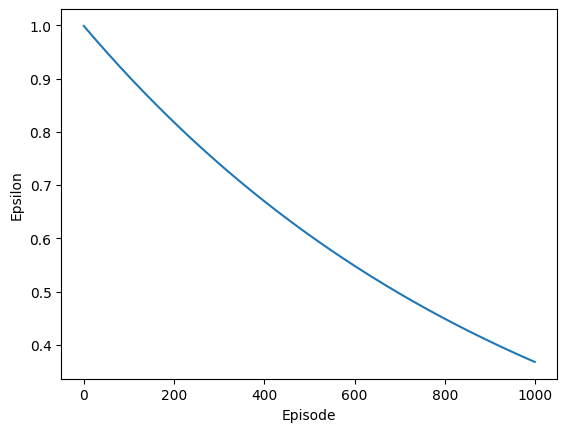

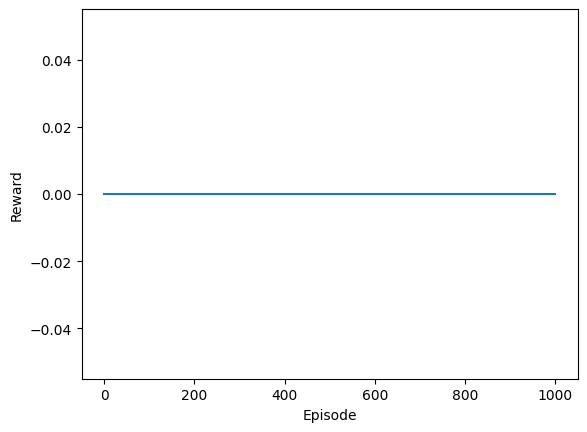

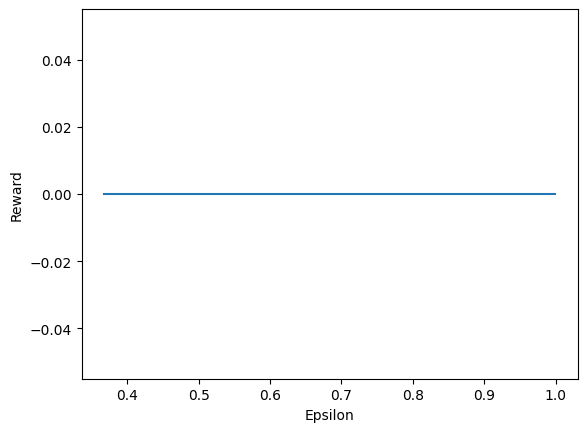

In [69]:
train()